<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Понижение размерности

## Цель работы

Ознакомиться с основными методами понижения размерности, изучить их применение на практике, сравнить эффективность разных методов и визуализировать результаты.

## Содержание работы

- Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.
- Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.
- Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.
- Выберите оптимальное количество главных компонент по методу локтя.
- Сгенерируйте двумерный датасет для классификации и примените на нем метод линейного дискриминантного анализа.
- Сгенерируйте двумерный датасет для классификации и примените на нем метод понижения размерности t-SNE.
- Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.

## PCA на сгенерированных данных

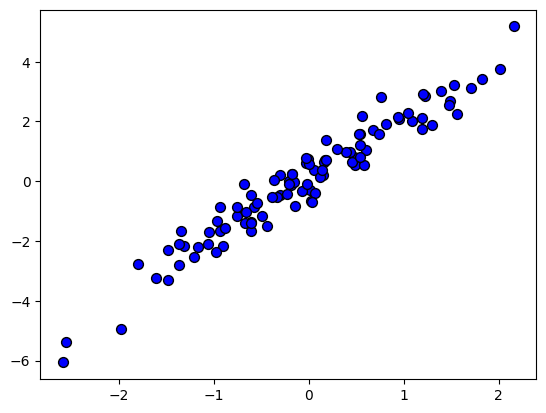

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.datasets import make_blobs, make_circles
from sklearn.decomposition import KernelPCA




n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)


In [ ]:
from sklearn.decomposition import PCA

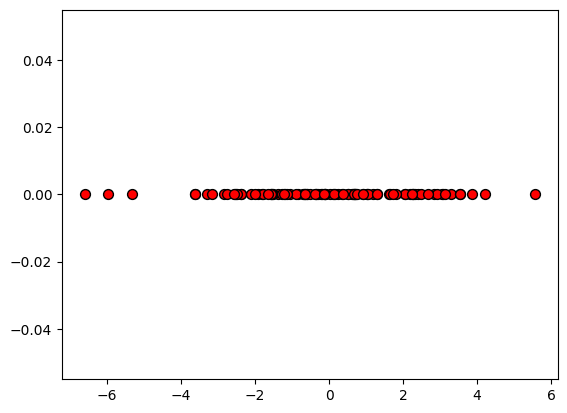

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}") #Оно значит, что понижение размерности с двух до одного измерения сохраняет 98% исходной дисперсии выборки.

Главная компонента (направление): [[0.43486242 0.9004969 ]]
Объясненная дисперсия: [0.98989935]


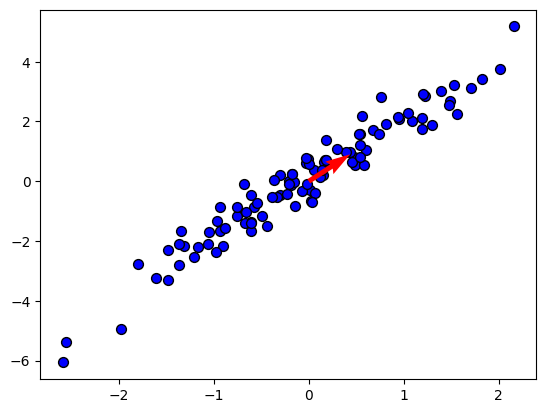

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

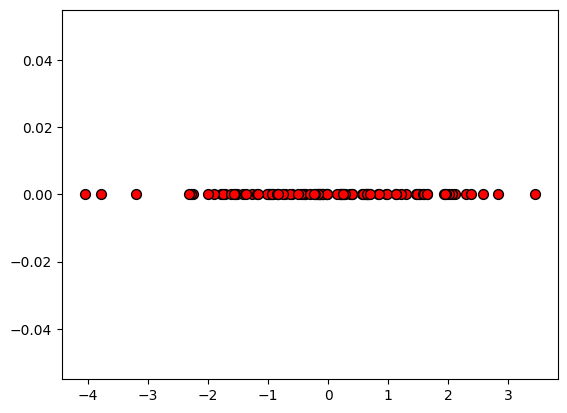

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

## PCA на многомерных данных

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

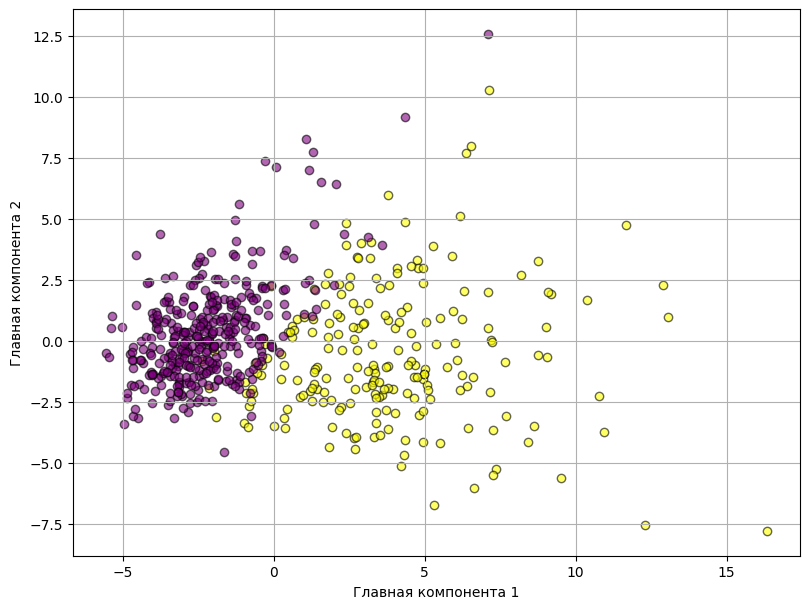

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['yellow', 'purple']
labels = data.target_names

for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=labels[i], alpha=0.6, edgecolor='k')

plt.grid(True)
plt.tight_layout()
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


In [ ]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


## Метод локтя для PCA

При определении оптимального количества компонент следует ориентироваться на то, насколько быстро растет количество информации в зависимости от количества измерений. Для того, чтобы отследить эту зависимость, построим график. Для этого построим алгоритм главных компонент с количеством компонент от 1 до 30



In [ ]:
n_components_range = range(1, 31)
explained_variance = []

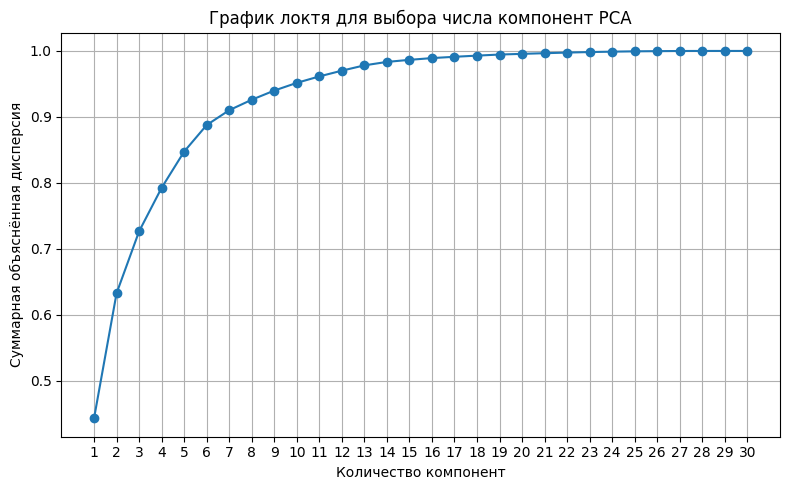

In [ ]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('График локтя для выбора числа компонент PCA')
plt.grid(True)
plt.xticks(n_components_range)
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


## Метод LDA

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[8.62627923 8.44642045]]


## Метод LDA для анизатропных классов

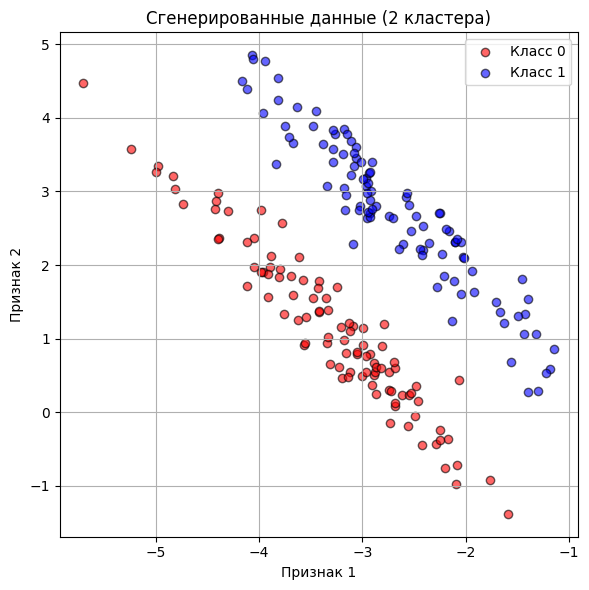

In [ ]:
X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Класс 0', alpha=0.6, edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Класс 1', alpha=0.6, edgecolor='k')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Сгенерированные данные (2 кластера)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Метод t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

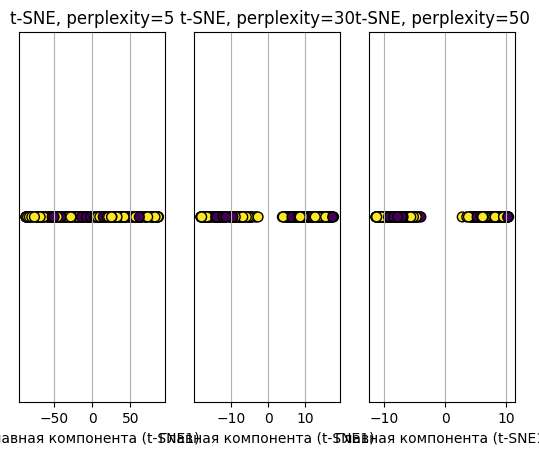

In [ ]:
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

## Kernel PCA для нелинейных данных

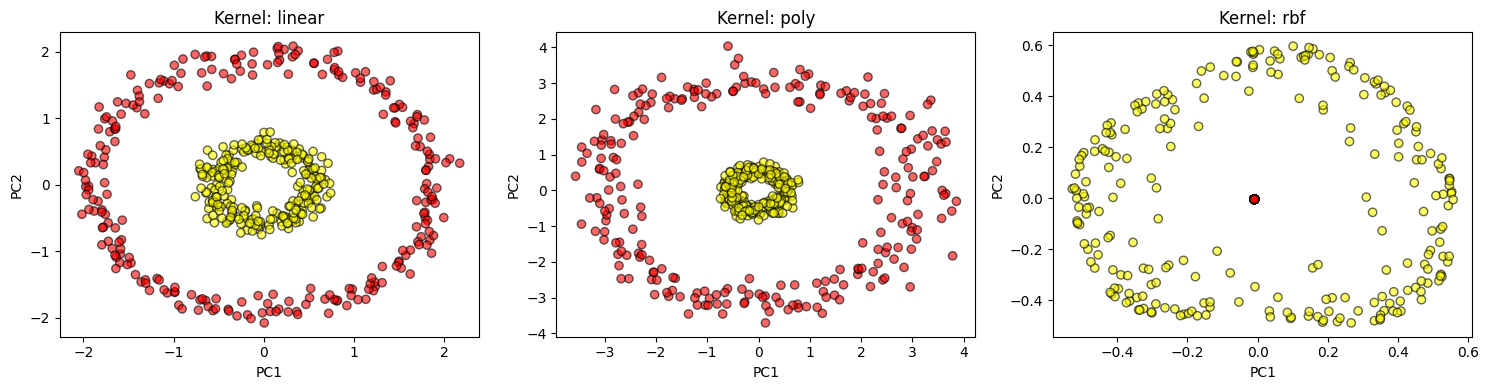

In [ ]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ['linear', 'poly', 'rbf']
gamma_values = [0.1, 1, 10]

plt.figure(figsize=(15, 4))

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel,
                     gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='autumn', edgecolor='k', alpha=0.6)
    plt.title(f'Kernel: {kernel}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()


In [ ]:
gamma_values = [0.1, 1, 10]

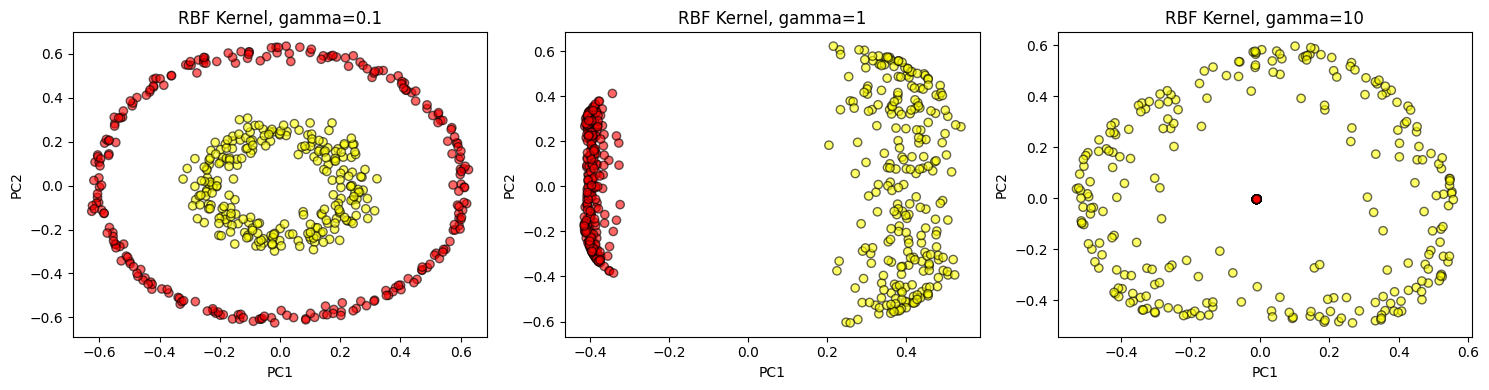

In [ ]:
plt.figure(figsize=(15, 4))
for i, gamma in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='autumn', edgecolor='k', alpha=0.6)
    plt.title(f'RBF Kernel, gamma={gamma}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()

## Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.

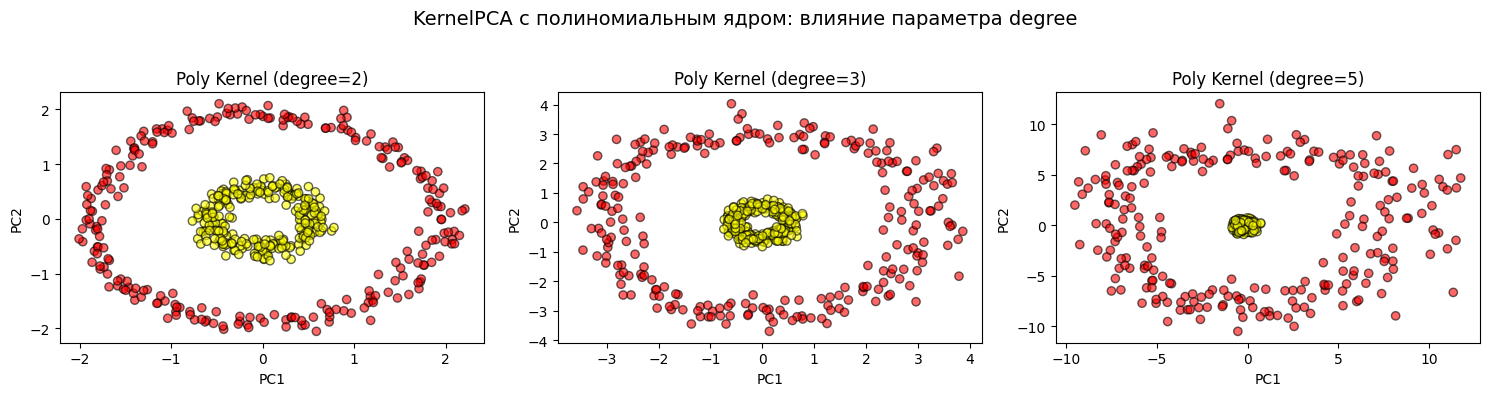

In [ ]:

degrees = [2, 3, 5]

plt.figure(figsize=(15, 4))
for i, degree in enumerate(degrees):
    kpca = KernelPCA(n_components=2, kernel='poly', degree=degree)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='autumn', edgecolor='k', alpha=0.6)
    plt.title(f'Poly Kernel (degree={degree})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.suptitle('KernelPCA с полиномиальным ядром: влияние параметра degree', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Задания для самостоятельного выполнения
- Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.
- Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.
- Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.
- Добавьте третий класс и примените LDA с n_components=2.
- Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?
- Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.
- Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.
- Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.
- Визуализируйте выбранный датасет при помощи разных методов понижения размерности.
- Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.
- Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

## Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA

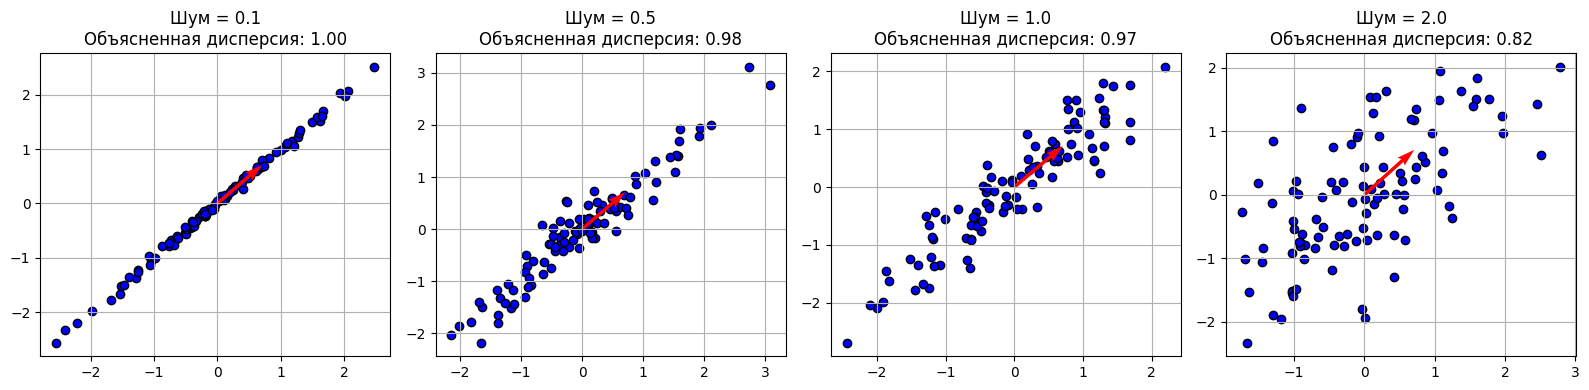

In [ ]:
n_samples = 100
noise_levels = [0.1, 0.5, 1.0, 2.0] # уровни шума

plt.figure(figsize=(16, 4))

for i, noise in enumerate(noise_levels):
    x = np.random.normal(0, 1, n_samples)
    y = 2 * x + np.random.normal(0, noise, n_samples)  # Шум в y

    X = np.column_stack((x, y))
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)

    plt.subplot(1, 4, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', edgecolor='k')
    pc1 = pca.components_[0]
    plt.quiver(0, 0, pc1[0], pc1[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
    plt.title(f'Шум = {noise}\nОбъясненная дисперсия: {pca.explained_variance_ratio_[0]:.2f}')


    plt.grid(True)

plt.tight_layout()
plt.show()


## Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.

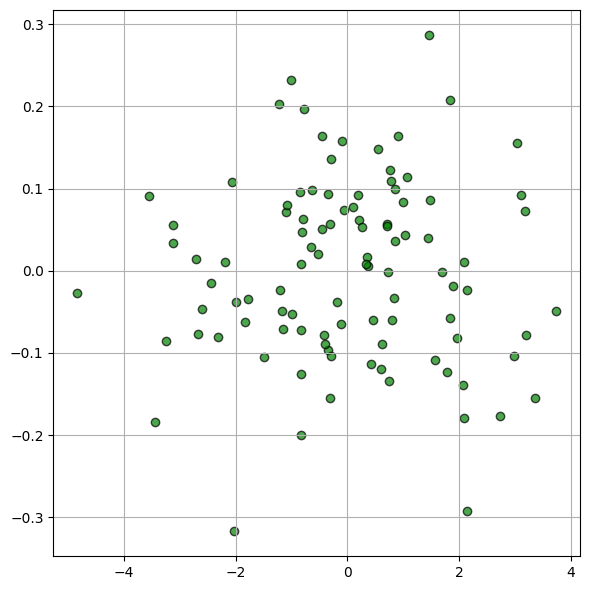

Объясненная дисперсия: [0.9946358  0.00405253]


In [ ]:
#Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.

np.random.seed(42)
n_samples = 100

#Создали коррелированные признаки
x1 = np.random.normal(0, 1, n_samples)
x2 = 2 * x1 + np.random.normal(0, 0.2, n_samples)  # сильная корреляция
x3 = 3 * x1 + np.random.normal(0, 0.3, n_samples)  # тоже сильно коррелирует

X = np.column_stack((x1, x2, x3))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='green', edgecolor='k', alpha=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Объясненная дисперсия:", pca.explained_variance_ratio_)


## Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.

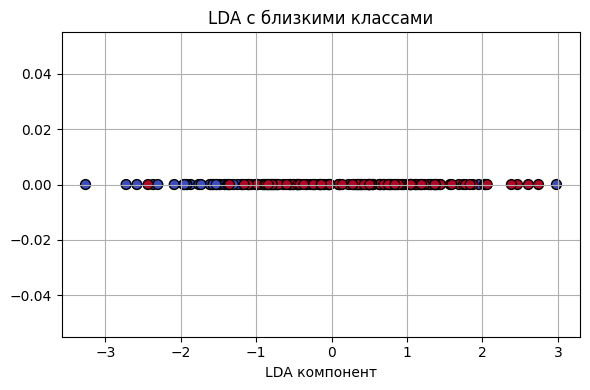

Коэффициенты LDA: [[0.86801011 1.07661897]]


In [ ]:
#Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Классы расположены близко друг к другу, слабая разделимость
x1_class0 = np.random.normal(2, 1, n_samples)
x2_class0 = np.random.normal(2, 1, n_samples)

x1_class1 = np.random.normal(3, 1, n_samples)  #чуть сдвинут
x2_class1 = np.random.normal(3, 1, n_samples)

X = np.vstack((
    np.column_stack((x1_class0, x2_class0)),
    np.column_stack((x1_class1, x2_class1))
))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(6, 4))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title('LDA с близкими классами')
plt.xlabel('LDA компонент')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Коэффициенты LDA: {lda.coef_}")


## Добавьте третий класс и примените LDA с n_components=2.

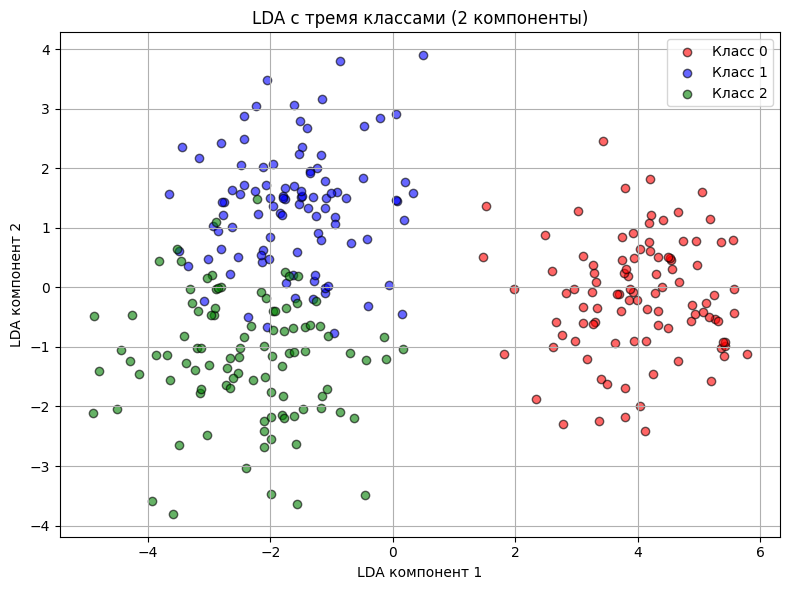

Коэффициенты LDA:
[[-4.17000876 -9.44833037]
 [ 3.77796673  2.20510401]
 [ 0.39204202  7.24322636]]


In [ ]:
#Создаём 3 класса данных
n_samples = 100

# Класс 0
x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)

# Класс 1
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

# Класс 2
x3 = np.random.normal(4, 1, n_samples)
y3 = np.random.normal(8, 1, n_samples)

#Объединяем всё в единый массив признаков и меток
X = np.vstack([
    np.column_stack((x1, y1)),
    np.column_stack((x2, y2)),
    np.column_stack((x3, y3))
])
y = np.hstack([
    np.zeros(n_samples),
    np.ones(n_samples),
    np.full(n_samples, 2)
])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Применяем LDA с двумя компонентами
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
labels = ['Класс 0', 'Класс 1', 'Класс 2']

for i, color in enumerate(colors):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1],
                color=color, label=labels[i], alpha=0.6, edgecolor='k')

plt.title('LDA с тремя классами (2 компоненты)')
plt.xlabel('LDA компонент 1')
plt.ylabel('LDA компонент 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Коэффициенты LDA:\n{lda.coef_}")


## Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?

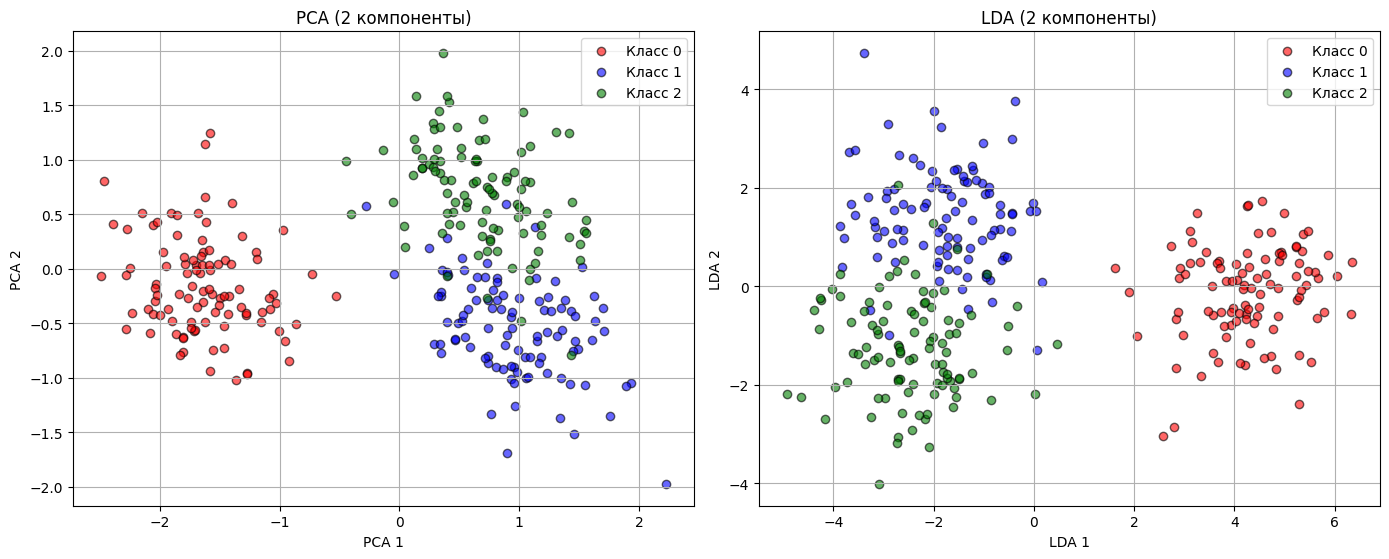

In [ ]:
n_samples = 100
np.random.seed(42)

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)

x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

x3 = np.random.normal(4, 1, n_samples)
y3 = np.random.normal(8, 1, n_samples)

X = np.vstack([
    np.column_stack((x1, y1)),
    np.column_stack((x2, y2)),
    np.column_stack((x3, y3))
])
y = np.hstack([
    np.zeros(n_samples),
    np.ones(n_samples),
    np.full(n_samples, 2)
])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA (2 компоненты)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#LDA (2 компоненты)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(14, 6))

#PCA
plt.subplot(1, 2, 1)
for i, color in enumerate(['red', 'blue', 'green']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, label=f'Класс {i}', alpha=0.6, edgecolor='k')
plt.title('PCA (2 компоненты)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)

#LDA
plt.subplot(1, 2, 2)
for i, color in enumerate(['red', 'blue', 'green']):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1],
                color=color, label=f'Класс {i}', alpha=0.6, edgecolor='k')
plt.title('LDA (2 компоненты)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.

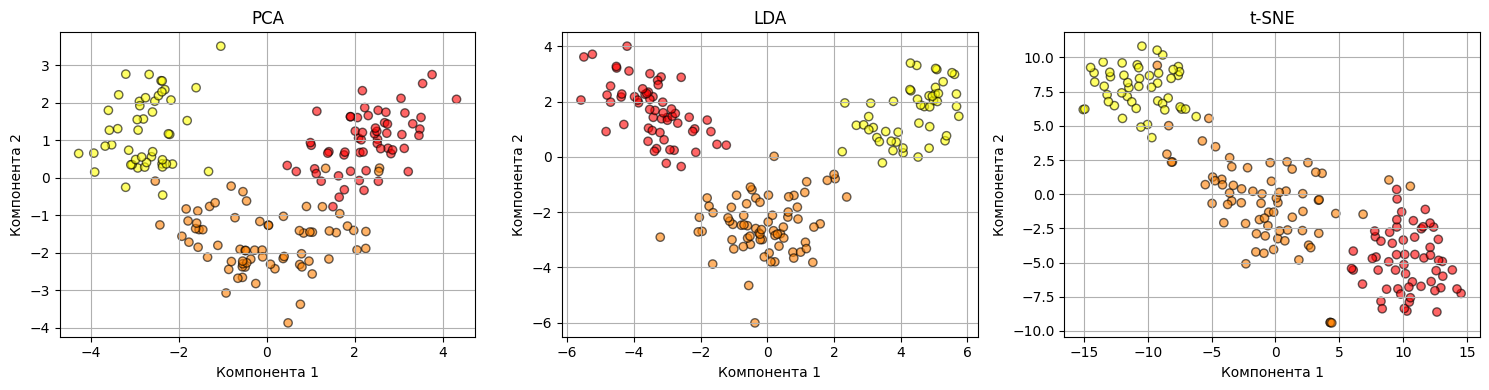

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

#t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

methods = {'PCA': X_pca, 'LDA': X_lda, 't-SNE': X_tsne}
colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 4))

for i, (name, result) in enumerate(methods.items()):
    plt.subplot(1, 3, i+1)
    scatter = plt.scatter(result[:, 0], result[:, 1], c=y, cmap='autumn', alpha=0.6, edgecolor='k')
    plt.title(name)
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.
perplexity — это гиперпараметр, который задаёт насколько широко t-SNE (метод нелинейного понижения размерности) смотрит на данные при попытке сохранить расстояния между точками.

tSNE
- t-SNE не пытается сохранить точные расстояния — оно пытается сохранить структуру соседства.
- Оно перекладывает локальные отношения из многомерного пространства в 2D/3D.
- Его визуализация — это графическое отражение, кто с кем ближе, а не прямое отображение расстояний.

Низкое значение perplexity (5–10):
- Сфокусировано на локальной структуре данных.
- Каждая точка ориентируется только на ближайших.
- Хорошо для выделения маленьких плотных кластеров.
- может привести к разрыву структуры или шуму.

Высокое значение perplexity (40–50):
- Смотрит более глобально, оценивая связи с большим числом соседей.
- Кластеры могут выглядеть сглаженными или слившимися.
- Хорошо для общей картины, но может скрыть мелкие различия.


Низкое perplexity - много кластеров, но не всегда достоверных.
Высокое perplexity - мало кластеров, но более стабильных.

## Визуализируйте выбранный датасет при помощи разных методов понижения размерности.

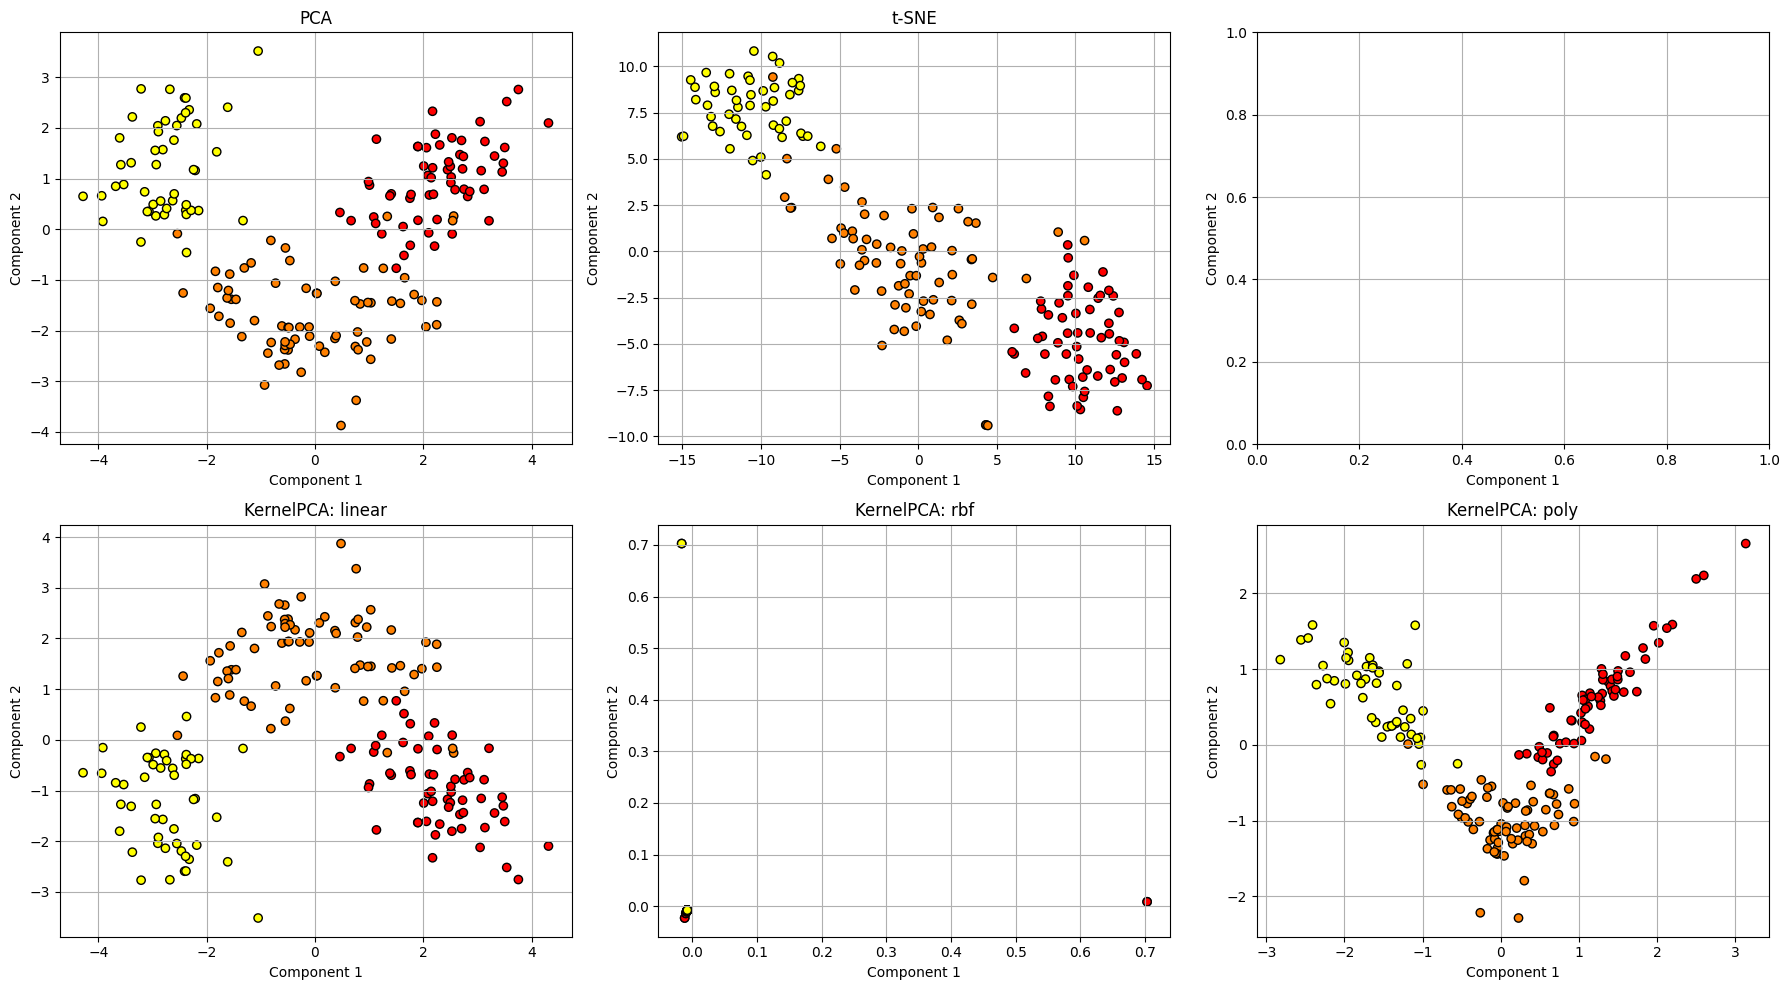

In [ ]:

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#tSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#KernelPCA с разными ядрами
kernels = ['linear', 'rbf', 'poly']
kpca_results = [KernelPCA(n_components=2, kernel=k, gamma=10 if k == 'rbf' else None).fit_transform(X_scaled) for k in kernels]


fig, axs = plt.subplots(2, 3, figsize=(18, 10))

#PCA
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='autumn', edgecolor='k')
axs[0, 0].set_title("PCA")

#tSNE
axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='autumn', edgecolor='k')
axs[0, 1].set_title("t-SNE")

#KernelPCA
for i, (k, X_kpca) in enumerate(zip(kernels, kpca_results)):
    axs[1, i].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='autumn', edgecolor='k')
    axs[1, i].set_title(f"KernelPCA: {k}")

for ax in axs.flat:
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.grid(True)

plt.tight_layout()
plt.show()


## Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.

У нас есть три алгоритма: PCA, LDA и t-SNE. Мы будем использовать PCA и LDA как методы для понижения размерности и классификации, а t-SNE — только для визуализации (так как он не является классификатором, а всего лишь методом нелинейного понижения размерности). Для каждого метода определим оптимальное количество кластеров с использованием метода локтя.

Для методов PCA и LDA мы будем вычислять долю объясненной дисперсии на основе результатов понижения размерности. Для каждого метода мы выберем оптимальное количество компонент и вычислим этот показатель.

Для метода локтя будем строить график объясненной дисперсии для PCA и LDA, чтобы выбрать оптимальное количество компонент.

Выводы:
Для PCA, LDA мы можем выбрать оптимальное количество компонент, анализируя их графики локтя.
Для t-SNE просто визуализируем результаты понижения размерности.
Для KMeans локоть показывает оптимальное количество кластеров.

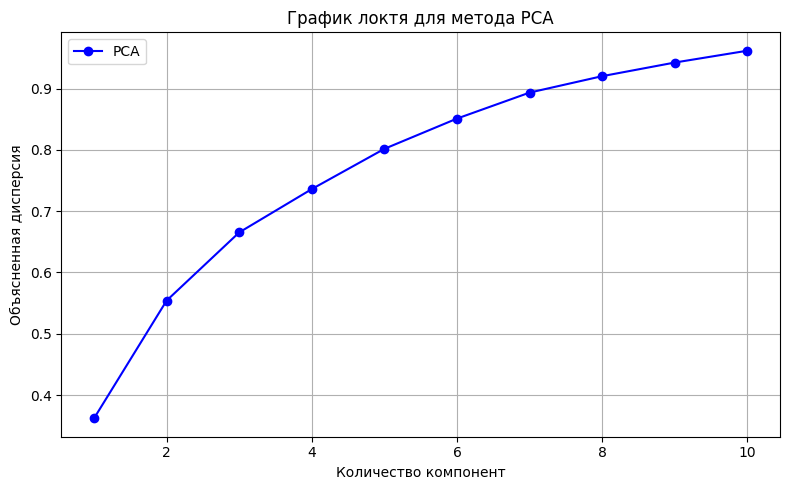

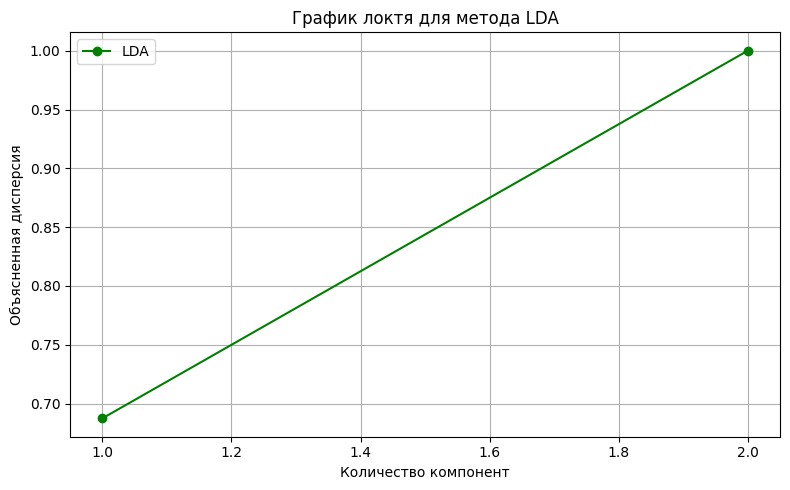

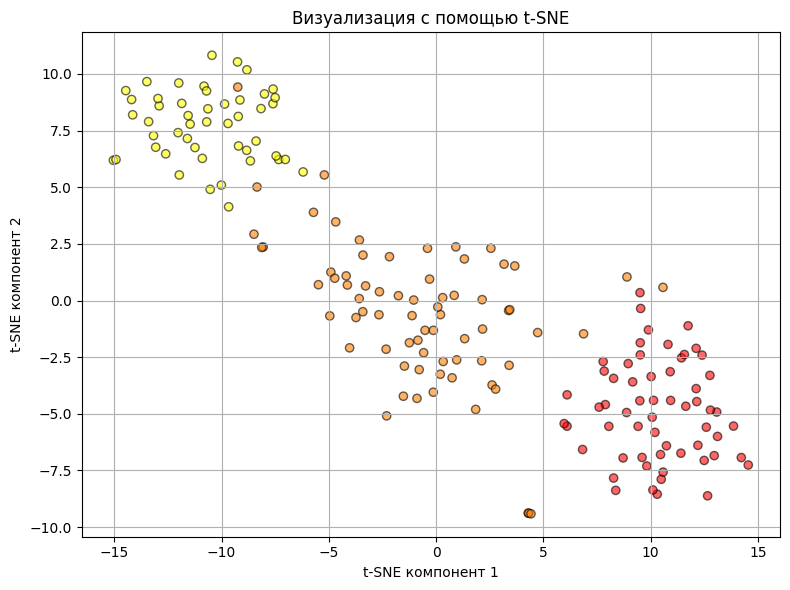

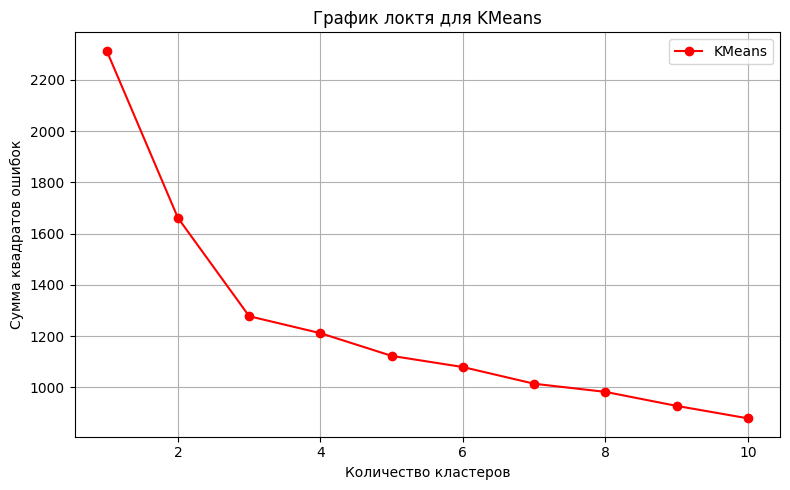

In [ ]:
from sklearn.metrics import explained_variance_score

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Для PCA вычислим объясненную дисперсию для разных компонент
explained_variance_pca = []
n_components_range = range(1, 11)  # Проверяем до 10 компонент

for n in n_components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_pca.append(np.sum(pca.explained_variance_ratio_))

#метода локтя для PCA
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, explained_variance_pca, marker='o', color='b', label='PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('График локтя для метода PCA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Для LDA количество компонент ограничено количеством классов минус один
explained_variance_lda = []
n_components_range_lda = range(1, 3)  # Для LDA ограничение до 2 компонент (так как 3 класса)

for n in n_components_range_lda:
    lda = LDA(n_components=n)
    X_lda = lda.fit_transform(X_scaled, y)
    explained_variance_lda.append(np.sum(lda.explained_variance_ratio_))

#метода локтя для LDA
plt.figure(figsize=(8, 5))
plt.plot(n_components_range_lda, explained_variance_lda, marker='o', color='g', label='LDA')
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('График локтя для метода LDA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Для t-SNE не вычисляем объясненную дисперсию, так как этот метод не работает с такой метрикой
# Однако мы можем визуализировать данные после снижения размерности с t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='autumn', edgecolor='k', alpha=0.6)
plt.title('Визуализация с помощью t-SNE')
plt.xlabel('t-SNE компонент 1')
plt.ylabel('t-SNE компонент 2')
plt.grid(True)
plt.tight_layout()
plt.show()


# Используем метод локтя для KMeans, чтобы выбрать оптимальное количество кластеров
kmeans_variance = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_variance.append(kmeans.inertia_)  # Сумма квадратов расстояний до центроидов

#График локтя для KMeans
plt.figure(figsize=(8, 5))
plt.plot(k_range, kmeans_variance, marker='o', color='r', label='KMeans')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок')
plt.title('График локтя для KMeans')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




## Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

In [ ]:
from sklearn.model_selection import train_test_split


data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


train_explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Объясненная диспер на обуч выборке: {train_explained_variance:.4f}")


X_test_pca = pca.transform(X_test)

test_explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Объясненная диспер на тест выборке: {test_explained_variance:.4f}")


Объясненная диспер на обуч выборке: 0.5460
Объясненная диспер на тест выборке: 0.5460
